<a href="https://colab.research.google.com/github/infi69/Hello-world/blob/master/DL_Assignment2_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Group No: 44

## Group Member Names:
1. VEMULA VASUDEVUDU (2021SC04939)
2.PANKAJ CHOUDHARY (2021SC04114)
3.ANANT KUMAR JAIN (2021SC04989)
4.TARUN GUPTA (2021SC04941)

## Journal used for the implemetation
**Journal title:** Convolutional Neural Networks Models for Facial Expression Recognition

**Authors:** Burhanudin Ramdhani, Esmeralda C. Djamal*, Ridwan Ilyas

**Journal Name:** Convolutional Neural Networks Models for Facial Expression Recognition

**Year:** 2018

# 1. Import the required libraries

In [43]:
##---------Type the code below this line------------------##

import sys
import os
import cv2
import numpy as np
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 2. Data Acquisition

For the problem identified by you, students have to find the data source themselves from any data source.

Provide the URL of the data used.

Write Code for converting the above downloaded data into a form suitable for DL



In [44]:
! pip install -q kaggle

In [45]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [46]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [47]:
! cp kaggle.json ~/.kaggle/

In [48]:
! chmod 600 ~/.kaggle/kaggle.json

In [49]:
! kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/global-youtube-statistics-2023                 Global YouTube Statistics 2023                       60KB  2023-07-28 15:36:38          14280        474  1.0              
mohammadtalib786/retail-sales-dataset                           Retail Sales Dataset                                 11KB  2023-08-22 18:33:09           1332         33  1.0              
nelgiriyewithana/top-spotify-songs-2023                         Most Streamed Spotify Songs 2023                     47KB  2023-08-26 11:04:57           3321        113  1.0              
joebeachcapital/linkedin-jobs                               

In [50]:
!kaggle datasets download -d msambare/fer2013

fer2013.zip: Skipping, found more recently modified local copy (use --force to force download)


In [51]:
!unzip /content/fer2013.zip -d /content/archive

Streaming output truncated to the last 5000 lines.
  inflating: /content/archive/train/sad/Training_65242339.jpg  
  inflating: /content/archive/train/sad/Training_65267116.jpg  
  inflating: /content/archive/train/sad/Training_65275626.jpg  
  inflating: /content/archive/train/sad/Training_6529266.jpg  
  inflating: /content/archive/train/sad/Training_65329617.jpg  
  inflating: /content/archive/train/sad/Training_65338712.jpg  
  inflating: /content/archive/train/sad/Training_65338797.jpg  
  inflating: /content/archive/train/sad/Training_65387162.jpg  
  inflating: /content/archive/train/sad/Training_65404494.jpg  
  inflating: /content/archive/train/sad/Training_65426218.jpg  
  inflating: /content/archive/train/sad/Training_65430136.jpg  
  inflating: /content/archive/train/sad/Training_65437377.jpg  
  inflating: /content/archive/train/sad/Training_6545735.jpg  
  inflating: /content/archive/train/sad/Training_65463385.jpg  
  inflating: /content/archive/train/sad/Training_654739

In [52]:
data_dir = '/content/archive/'

In [53]:
!ls /content/archive

test  train


In [54]:
data_dir = '/content/archive/'  # Update this to the correct path
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

In [55]:
train_dir

'/content/archive/train'

In [56]:
len(os.listdir(os.path.join(train_dir,'angry'))) +len(os.listdir(os.path.join(train_dir,'disgust'))) + len(os.listdir(os.path.join(train_dir,'fear')))+\
len(os.listdir(os.path.join(train_dir,'happy'))) + len(os.listdir(os.path.join(train_dir,'neutral'))) +\
len(os.listdir(os.path.join(train_dir,'sad'))) + len(os.listdir(os.path.join(train_dir,'surprise')))

28709

In [57]:
len(os.listdir(os.path.join(train_dir,'angry'))),len(os.listdir(os.path.join(test_dir,'angry')))

(3995, 958)

In [58]:
len(os.listdir(os.path.join(train_dir,'disgust'))),len(os.listdir(os.path.join(test_dir,'disgust')))

(436, 111)

In [59]:
len(os.listdir(os.path.join(train_dir,'fear')))

4097

In [60]:
len(os.listdir(os.path.join(train_dir,'happy'))),len(os.listdir(os.path.join(test_dir,'happy')))

(7215, 1774)

In [61]:
len(os.listdir(os.path.join(train_dir,'neutral'))),len(os.listdir(os.path.join(test_dir,'neutral')))

(4965, 1233)

In [62]:
len(os.listdir(os.path.join(train_dir,'sad')))

4830

In [63]:
len(os.listdir(os.path.join(train_dir,'surprise')))

3171

In [64]:
os.listdir(train_dir)

['fear', 'disgust', 'happy', 'neutral', 'surprise', 'angry', 'sad']

In [65]:
3995+4965+7215+436

16611

In [66]:
class_names = sorted(os.listdir(train_dir))
num_classes = len(class_names)
print("Number of classes:", num_classes)

Number of classes: 7


# 3. Data Preparation

Perform the data prepracessing that is required for the data that you have downloaded.


This stage depends on the dataset that is used.

In [67]:
class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [74]:
# Load and preprocess the data
X = []
y = []

for class_name in class_names:
    class_dir = os.path.join(train_dir, class_name)
    class_label = class_names.index(class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (48, 48))
        X.append(image)
        y.append(class_label)

X = np.array(X) / 255.0  # Normalize pixel values to [0, 1]
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Number of training samples:", len(X_train))
print("Number of testing samples:", len(X_test))

Number of training samples: 22967
Number of testing samples: 5742


In [69]:
print("Target variable for training:", y_train)
print("Target variable for testing:", y_test)


Target variable for training: [4 4 0 ... 0 4 5]
Target variable for testing: [2 3 6 ... 2 2 0]


In [70]:
for label in y_train:
   class_name = class_names[label]
   print("Class name:", class_name)


Streaming output truncated to the last 5000 lines.
Class name: happy
Class name: fear
Class name: fear
Class name: disgust
Class name: angry
Class name: neutral
Class name: angry
Class name: happy
Class name: angry
Class name: sad
Class name: surprise
Class name: neutral
Class name: neutral
Class name: sad
Class name: fear
Class name: happy
Class name: happy
Class name: sad
Class name: fear
Class name: neutral
Class name: surprise
Class name: sad
Class name: surprise
Class name: fear
Class name: fear
Class name: sad
Class name: angry
Class name: happy
Class name: happy
Class name: happy
Class name: disgust
Class name: happy
Class name: angry
Class name: disgust
Class name: happy
Class name: angry
Class name: angry
Class name: angry
Class name: surprise
Class name: surprise
Class name: neutral
Class name: fear
Class name: neutral
Class name: neutral
Class name: surprise
Class name: neutral
Class name: neutral
Class name: neutral
Class name: fear
Class name: happy
Class name: fear
Class 

## 4. Deep Neural Network Architecture


## 4.1 Design the architecture that you will be using

* CNN / RNN / Transformer as per the journal referenced



In [31]:
model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2,2)),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2,2)),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
    Flatten(),
    Dense(1024, activation='relu'),
     Dropout(0.2),
    Dense(num_classes, activation='softmax')])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 128)       1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 21, 21, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 17, 17, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                    

In [37]:
##---------Type the code below this line------------------##

# Define the CNN model
model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2,2)),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2,2)),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
    Flatten(),
    Dense(1024, activation='relu'),
     Dropout(0.2),
    Dense(num_classes, activation='softmax')])


# Define your optimizer with momentum and weight decay
optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1,
    momentum=0.9,
    weight_decay= 0.0001  # Set the weight decay value (e.g., 1e-4)
)
# Compile the model
model.compile(optimizer=optimizer , loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Number of layers
num_layers = len(model.layers)
print("Number of layers:", num_layers)

# Total number of trainable parameters
total_params = model.count_params()
print("Total number of trainable parameters:", total_params)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 46, 46, 128)       1280      
                                                                 
 conv2d_25 (Conv2D)          (None, 44, 44, 128)       147584    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 21, 21, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 19, 19, 128)       147584    
                                                                 
 conv2d_27 (Conv2D)          (None, 17, 17, 128)       147584    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                 

## 4.2 DNN Report

Report the following and provide justification for the same.

* Number of layers
* Number of units in each layer
* Total number of trainable parameters



# 5. Training the model


In [38]:
optimizer

In [36]:
# Configure the training, by using appropriate optimizers, regularizations and loss functions
##---------Type the code below this line------------------##

# Configure the training
#optimizer = Adam(learning_rate=0.001)  # We can adjust the learning rate as needed
regularization_strength = 0.001  # Strength of L2 regularization

# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1), kernel_regularizer=l2(regularization_strength)),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(regularization_strength)),
#     MaxPooling2D((2, 2)),
#     Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(regularization_strength)),
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(128, activation='relu', kernel_regularizer=l2(regularization_strength)),
#     Dropout(0.5),
#     Dense(num_classes, activation='softmax', kernel_regularizer=l2(regularization_strength))
# ])

model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(48, 48, 1),kernel_regularizer=l2(regularization_strength)),
    Conv2D(128, (3, 3), activation='relu',kernel_regularizer=l2(regularization_strength)),
    MaxPooling2D(pool_size=(3, 3), strides=(2,2)),
    Conv2D(128, (3, 3), activation='relu',kernel_regularizer=l2(regularization_strength)),
    Conv2D(128, (3, 3), activation='relu',kernel_regularizer=l2(regularization_strength)),
    MaxPooling2D(pool_size=(3, 3), strides=(2,2)),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation='relu',kernel_regularizer=l2(regularization_strength)),
    Conv2D(128, (3, 3), activation='relu',kernel_regularizer=l2(regularization_strength)),
    MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
    Flatten(),
    Dense(1024, activation='relu',kernel_regularizer=l2(regularization_strength)),
     Dropout(0.2),
    Dense(num_classes, activation='softmax',kernel_regularizer=l2(regularization_strength))])

# Compile the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [77]:
model.fit(X_train, batch_size=128,epochs=300,validation_data=X_test.all(),shuffle=True)

Epoch 1/300


ValueError: ignored

# 6. Test the model


In [ ]:
##---------Type the code below this line------------------##
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


180/180 - 6s - loss: 2.3436 - accuracy: 0.1078 - 6s/epoch - 35ms/step
Test Loss: 2.3435847759246826
Test Accuracy: 0.10780216008424759


# 7. Report the result

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


Epoch 1/10
575/575 [==============================] - 80s 136ms/step - loss: 1.8806 - accuracy: 0.2412 - val_loss: 1.8039 - val_accuracy: 0.2440
Epoch 2/10
575/575 [==============================] - 71s 123ms/step - loss: 1.7857 - accuracy: 0.2717 - val_loss: 1.7203 - val_accuracy: 0.2926
Epoch 3/10
575/575 [==============================] - 80s 139ms/step - loss: 1.7143 - accuracy: 0.3297 - val_loss: 1.6408 - val_accuracy: 0.3724
Epoch 4/10
575/575 [==============================] - 77s 134ms/step - loss: 1.6544 - accuracy: 0.3694 - val_loss: 1.5864 - val_accuracy: 0.4116
Epoch 5/10
575/575 [==============================] - 67s 117ms/step - loss: 1.6193 - accuracy: 0.3907 - val_loss: 1.5797 - val_accuracy: 0.4047
Epoch 6/10
575/575 [==============================] - 68s 118ms/step - loss: 1.5878 - accuracy: 0.4078 - val_loss: 1.5561 - val_accuracy: 0.4340
Epoch 7/10
575/575 [==============================] - 67s 117ms/step - loss: 1.5760 - accuracy: 0.4145 - val_loss: 1.5387 - val_ac

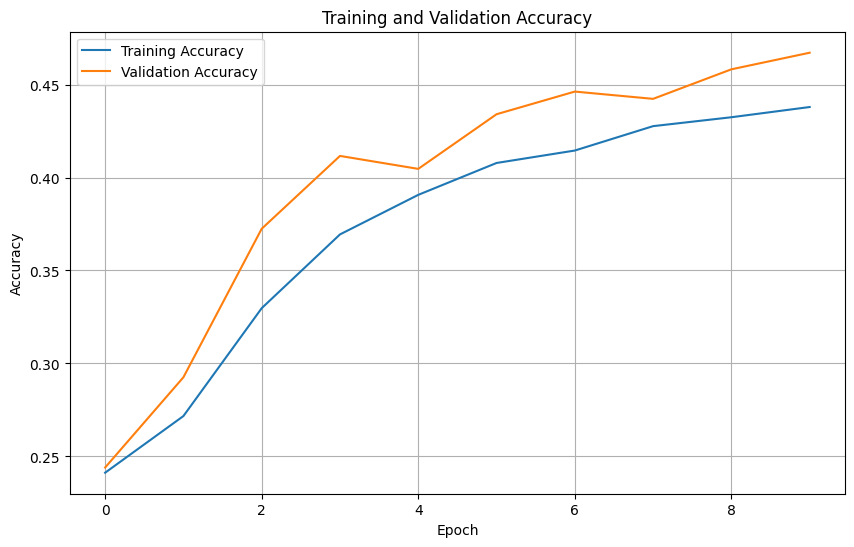

In [ ]:
# Define the number of epochs and batch size
epochs = 10  # We can adjust this value based on your training requirements
batch_size = 32  # We can adjust this value based on your memory constraints

# Train the model and save the training history
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Plot the training and validation accuracy history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


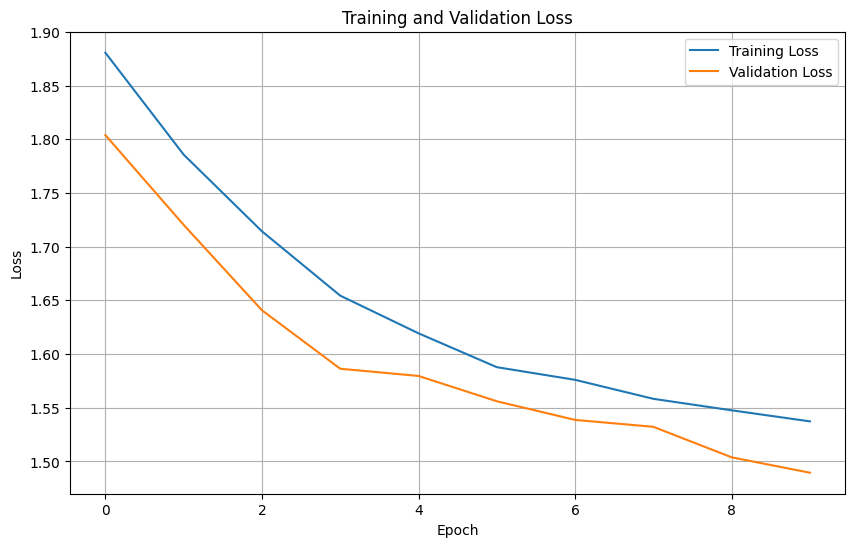

In [ ]:
# Plot the training and validation loss history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

# Print the testing accuracy and loss
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


180/180 - 4s - loss: 1.5005 - accuracy: 0.4573 - 4s/epoch - 24ms/step
Test Loss: 1.5005313158035278
Test Accuracy: 0.45733192563056946


180/180 [==============================] - 6s 33ms/step


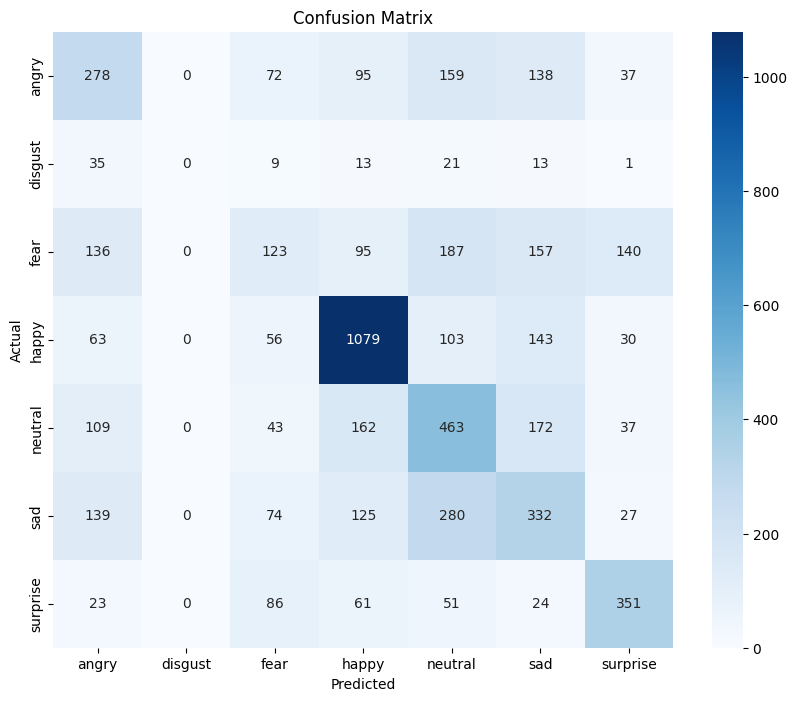

In [ ]:
# Get model predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Get model predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the classification report
report = classification_report(y_test, y_pred_classes, target_names=class_names)

# Print the classification report
print(report)

180/180 [==============================] - 5s 26ms/step
              precision    recall  f1-score   support

       angry       0.36      0.36      0.36       779
     disgust       0.00      0.00      0.00        92
        fear       0.27      0.15      0.19       838
       happy       0.66      0.73      0.70      1474
     neutral       0.37      0.47      0.41       986
         sad       0.34      0.34      0.34       977
    surprise       0.56      0.59      0.58       596

    accuracy                           0.46      5742
   macro avg       0.36      0.38      0.37      5742
weighted avg       0.44      0.46      0.44      5742



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck